In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [3]:
w0 = np.random.uniform(-1/4,1/4)
w1 = np.random.uniform(-1,1)
w2 = np.random.uniform(-1,1)
W = [w0,w1,w2]
print("w0",w0)
print("w1",w1)
print("w2",w2)
print("W", W)

w0 -0.041488997648713
w1 0.4406489868843162
w2 -0.9997712503653102
W [-0.041488997648713, 0.4406489868843162, -0.9997712503653102]


In [4]:
def sample_fun(samples):
  S = np.random.uniform(-1,1,(samples,2))
  return S

In [5]:
def Matrix_multiplication(Weight_matrix, S):
  s1 = []   # greater than equal to zero points
  s0 = []   # less than zero points
  for i in S:
    total = Weight_matrix[0] + i[0]*Weight_matrix[1] + i[1]*Weight_matrix[2]
    if total >= 0:
      s1.append([i[0],i[1]])
    else:
      s0.append([i[0],i[1]])
  return s0,s1
# print(S1)
# print(S0)

In [6]:
def vectors_plot(x_S1, y_S1, x_S0, y_S0, W):
  fig0 = plt.subplot()
  fig0.scatter(x_S1, y_S1, color = "red", marker = "x", label = "S1 points")
  fig0.scatter(x_S0, y_S0, color = "black", label = "S0 points")

  # X-Intercept, Y-Intercept to draw a boundary line
  X_intercept = [-W[0]/W[1],0]
  Y_intercept = [0,-W[0]/W[2]]
  # print("X_intercept",X_intercept)
  # print("Y_intercept",Y_intercept)

  x_lim = fig0.get_xlim()
  y_lim = fig0.get_ylim()
  slope,intercept = np.polyfit(X_intercept, Y_intercept,1)
  X_points = np.linspace(x_lim[0], x_lim[1], 100)
  Y_points = np.poly1d([slope,intercept])(X_points)
  fig0.plot(X_points, Y_points, color = "cyan", lw = 2)
  fig0.legend(loc = (1.05,0.779))
  fig0.set_xlim(x_lim)
  fig0.set_ylim(y_lim)
  plt.title("Vectors Plot", fontsize = 14, fontweight="bold")
  plt.xlabel("X1 -------------->")
  plt.ylabel("X2 -------------->")
  plt.show()

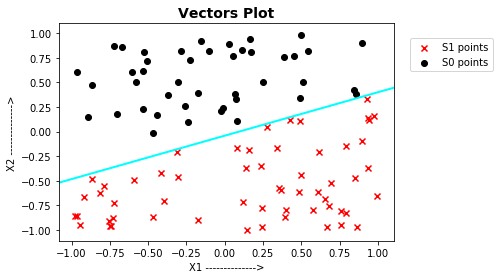

In [7]:
S = sample_fun(samples = 100)
S0, S1 = Matrix_multiplication(W, S)
x_S1 = [x_s1[0] for x_s1 in S1]
y_S1 = [y_s1[1] for y_s1 in S1]
x_S0 = [x_s0[0] for x_s0 in S0]
y_S0 = [y_s0[1] for y_s0 in S0]
vectors_plot(x_S1, y_S1, x_S0, y_S0, W)

In [8]:
def classifications(new_S1, S1, new_S0, S0):
  count1 = [i for i in S1 if i not in new_S1]
  count2 = [j for j in S0 if j not in new_S0]
  # print(len(count1))
  # print(len(count2))
  return len(count1) + len(count2)

In [9]:
new_w0 = np.random.uniform(-1,1)
new_w1 = np.random.uniform(-1,1)
new_w2 = np.random.uniform(-1,1)
new_W = [new_w0, new_w1, new_w2]
print("new_W", new_W)

new_W [0.28313241789267507, -0.21998457171750752, -0.02801866580618051]


In [10]:
# new_weights
def perceptron_algo(new_W,eta):
  epoch = 1
  epoch_list = []
  misclassifications_list = []
  while epoch:
    new_S1 = []
    new_S0 = []
    new_S0, new_S1 = Matrix_multiplication(new_W, S)
    misclassifications = classifications(new_S1, S1, new_S0, S0)
    # print("misclassifications", misclassifications)
    if misclassifications == 0:
      break
    else:
      misclassifications_list.append(misclassifications)
      epoch_list.append(epoch)
      epoch+=1
      # print(len(S))
      for i in S:
        predicted = new_W[0] + i[0]*new_W[1] + i[1]*new_W[2]
        # print("predicted",predicted)
        if predicted >=0:
          if [i[0],i[1]] in S1:
            continue
          else:
            new_W = np.array(new_W)- eta*np.hstack((1,i))
        else:
          if [i[0],i[1]] in S0:
            continue
          else:
            new_W = np.array(new_W) + eta*np.hstack((1,i))
            # print("__________________")
  print(new_W)
  return epoch_list, misclassifications_list

In [11]:
def plot_fun(X,Y, xlabel, ylabel, color, lw):
  fig = plt.subplot()
  fig.plot(Epoch_values, N_misclassifications, color = color, lw = lw)
  plt.title("Epoch Vs Misclassifications", fontsize = 14, fontweight="bold")
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

[ 0.28313242  2.17385866 -6.66608558]


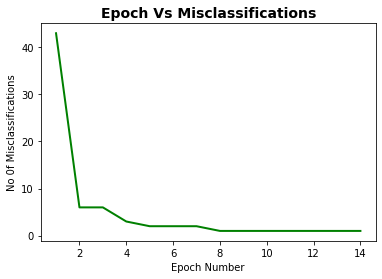

In [12]:
Epoch_values, N_misclassifications = perceptron_algo(new_W, eta = 1)
# print(Epoch_values)
# print(N_misclassifications)
plot_fun(Epoch_values, N_misclassifications, xlabel = "Epoch Number", ylabel = "No 0f Misclassifications", color = "green", lw = 2)
# plt.show()
# fig1.plot(Epoch_values, N_misclassifications, xlabel = "Epoch Number", ylabel = "No 0f Misclassifications", color = "green", lw = 2)
# plt.xlabel("Epoch Number")
# plt.ylabel("No 0f Misclassifications")
# plt.show()

[  0.28313242   7.42517593 -21.86268555]
[1, 2, 3]
[43, 1, 1]


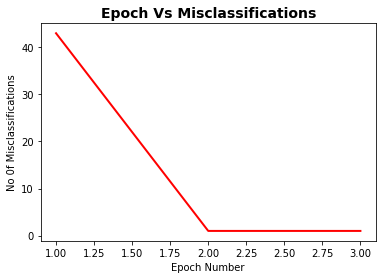

In [13]:
Epoch_values, N_misclassifications = perceptron_algo(new_W, eta = 10)
# print(Epoch_values)
# print(N_misclassifications)
plot_fun(Epoch_values, N_misclassifications, xlabel = "Epoch Number", ylabel = "No 0f Misclassifications", color = "red", lw = 2)
# plt.show()
# fig2 = plt.subplot()
# fig2.plot(Epoch_values, N_misclassifications, color = "blue", lw = 2)
# plt.xlabel("Epoch Number")
# plt.ylabel("No 0f Misclassifications")
# plt.show()

[-0.01686758  0.16282178 -0.3610968 ]
[1, 2]
[43, 5]


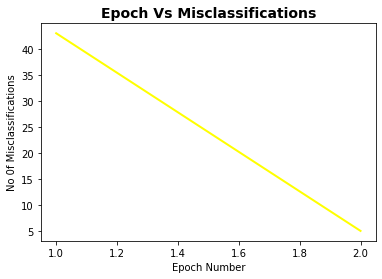

In [14]:
Epoch_values, N_misclassifications = perceptron_algo(new_W, eta = 0.1)
# print(Epoch_values)
# print(N_misclassifications)
plot_fun(Epoch_values, N_misclassifications, xlabel = "Epoch Number", ylabel = "No 0f Misclassifications", color = "yellow", lw = 2)
# plt.show()
# fig3 = plt.subplot()
# fig3.plot(Epoch_values, N_misclassifications, color = "blue", lw = 2)
# plt.xlabel("Epoch Number")
# plt.ylabel("No 0f Misclassifications")
# plt.show()

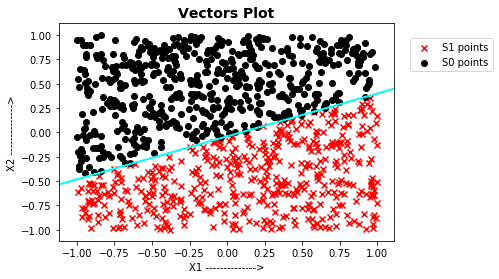

In [15]:
# for N = 1000
S = sample_fun(samples = 1000)
S0, S1 = Matrix_multiplication(W, S)
x_S1 = [x_s1[0] for x_s1 in S1]
y_S1 = [y_s1[1] for y_s1 in S1]
x_S0 = [x_s0[0] for x_s0 in S0]
y_S0 = [y_s0[1] for y_s0 in S0]
vectors_plot(x_S1, y_S1, x_S0, y_S0, W)

[ -0.71686758   7.60064855 -17.14761834]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
[531, 39, 26, 35, 35, 32, 30, 30, 30, 29, 7, 31, 29, 10, 8, 9, 8, 5, 5, 3, 9, 5, 4, 2, 8, 4, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1]


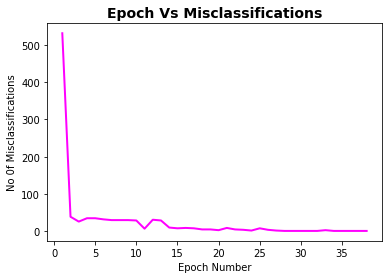

In [16]:
Epoch_values, N_misclassifications = perceptron_algo(new_W, eta = 1)
# print(Epoch_values)
# print(N_misclassifications)
plot_fun(Epoch_values, N_misclassifications, xlabel = "Epoch Number", ylabel = "No 0f Misclassifications", color = "magenta", lw = 2)
# plt.show()
# fig4 = plt.subplot()
# fig4.plot(Epoch_values, N_misclassifications, color = "blue", lw = 2)
# plt.xlabel("Epoch Number")
# plt.ylabel("No 0f Misclassifications")
# plt.show()

[  -9.71686758  102.27900124 -231.20101237]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]
[531, 66, 20, 21, 21, 17, 28, 21, 15, 24, 20, 21, 20, 20, 21, 20, 16, 21, 15, 11, 20, 6, 6, 6, 6, 7, 9, 9, 5, 4, 8, 8, 8, 8, 7, 7, 5, 2, 2, 4, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]


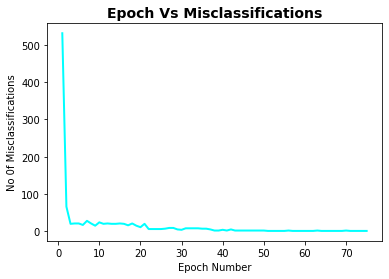

In [17]:
Epoch_values, N_misclassifications = perceptron_algo(new_W, eta = 10)
# print(Epoch_values)
# print(N_misclassifications)
plot_fun(Epoch_values, N_misclassifications, xlabel = "Epoch Number", ylabel = "No 0f Misclassifications", color = "cyan", lw = 2)
# plt.show()
# fig5 = plt.subplot()
# fig5.plot(Epoch_values, N_misclassifications, color = "blue", lw = 2)
# plt.xlabel("Epoch Number")
# plt.ylabel("No 0f Misclassifications")
# plt.show()

[-0.11686758  1.23037054 -2.77551764]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153]
[531, 24, 10, 15, 11, 14, 10, 14, 16, 12, 11, 11, 17, 12, 17, 17, 16, 17, 15, 16, 17, 12, 17, 12, 11, 14, 12, 17, 14, 12, 17, 16, 13, 17, 14, 17, 14, 17, 18, 7, 8, 11, 18, 7, 7, 7, 7, 6, 6, 7, 6, 6, 6, 5, 5, 9, 9, 8, 8, 7, 7, 7, 7, 7, 5, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 

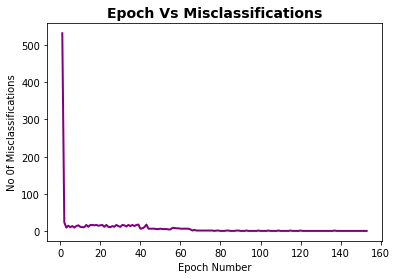

In [18]:
Epoch_values, N_misclassifications = perceptron_algo(new_W, eta = 0.1)
# print(Epoch_values)
# print(N_misclassifications)
plot_fun(Epoch_values, N_misclassifications, xlabel = "Epoch Number", ylabel = "No 0f Misclassifications", color = "purple", lw = 2)
# plt.show()
# fig6 = plt.subplot()
# fig6.plot(Epoch_values, N_misclassifications, color = "green", lw = 2)
# plt.xlabel("Epoch Number")
# plt.ylabel("No 0f Misclassifications")
# plt.show()